# Recurrent Prediction

In [ ]:
import h5py
import scipy
import numpy as np
import torch
import os
import sys
from dataset.dataset_prediction import PRE8dDataset

In [ ]:
def load(path):
    path = path + "/with_imputation"
    preds = []
    for i in range(10):
        preds.append(np.load(path+"/prediction_{}.npy".format(i)))
    return np.stack(preds, axis=1)

In [ ]:
category = []
pred_len = []
mse_list = []
mae_list = []

**predictions for 1 year (PRE)**

In [ ]:
import argparse
from torch.utils.data import DataLoader

parser = argparse.ArgumentParser(description='Prediction')
parser.add_argument('--area', type=str, default='PRE', help='which bay area we focus')
parser.add_argument('--method', type=str, default='GraphTransformer', help='which bay area we focus')
parser.add_argument('--index', type=int, default=0, help='which dataset we use')

parser.add_argument('--epochs', type=int, default=200, help='epochs')
parser.add_argument('--batch_size', type=int, default=8, help='batch size')
parser.add_argument('--lr', type=float, default=1e-4, help='learning rate')
parser.add_argument('--wd', type=float, default=1e-6, help='weight decay')
parser.add_argument('--test_freq', type=int, default=20, help='test per n epochs')
parser.add_argument('--hidden_dim', type=int, default=8)

parser.add_argument('--in_len', type=int, default=46)
parser.add_argument('--out_len', type=int, default=46)
parser.add_argument('--missing_ratio', type=float, default=0.1)

config = parser.parse_args([])
test_dloader = DataLoader(PRE8dDataset(config, mode='test'), config.batch_size, shuffle=False)

labels_list = []
label_masks_list = []

for test_step, (datas, data_ob_masks, data_gt_masks, labels, label_masks) in enumerate(test_dloader):
    labels_list.append(labels[:,:,0])
    label_masks_list.append(label_masks[:,:,0])

labels = torch.cat(labels_list, 0)
label_masks = torch.cat(label_masks_list, 0)
label_masks = label_masks.squeeze()
labels = labels.squeeze()

In [ ]:
base_dir = "./log/prediction_46_46/{}/".format(config.area)
prediction_our = load(base_dir+"STIMP")
prediction_our = torch.from_numpy(prediction_our).squeeze()
mse_our= (((prediction_our.mean(1) - labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our[mse_our==0]=np.nan
# category.extend(["STIMP (Pearl River Estuary)" for i in range(mse_our.shape[-1])])
# pred_len.extend(["one" for i in range(mse_our.shape[-1])])
# category.extend(["STIMP recurrent (Pearl River Estuary)" for i in range(mse_our.shape[-1])])
# pred_len.extend(["one" for i in range(mse_our.shape[-1])])
# mse_list.extend([mse_our.numpy(), mse_our.numpy()])

category.extend(["STIMP (Pearl River Estuary)"])
pred_len.extend(["one"])
category.extend(["STIMP recurrent (Pearl River Estuary)"])
pred_len.extend(["one"])
mse_list.extend([np.nanmean(mse_our), np.nanmean(mse_our)])

mae_our= (np.abs((prediction_our.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our[mae_our==0]=np.nan
mae_list.extend([np.nanmean(mae_our), np.nanmean(mae_our)])

In [ ]:
config.area="MEXICO"
test_dloader = DataLoader(PRE8dDataset(config, mode='test'), config.batch_size, shuffle=False)

labels_list = []
label_masks_list = []

for test_step, (datas, data_ob_masks, data_gt_masks, labels, label_masks) in enumerate(test_dloader):
    labels_list.append(labels[:,:,0])
    label_masks_list.append(label_masks[:,:,0])

labels = torch.cat(labels_list, 0)
label_masks = torch.cat(label_masks_list, 0)
label_masks = label_masks.squeeze()
labels = labels.squeeze()
base_dir = "./log/prediction_46_46/{}/".format(config.area)
prediction_our = load(base_dir+"STIMP")
prediction_our = torch.from_numpy(prediction_our).squeeze()
mse_our= (((prediction_our.mean(1) - labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our[mse_our==0]=np.nan
category.extend(["STIMP (The Gulf of Mexico)"])
pred_len.extend(["one"])
category.extend(["STIMP recurrent (The Gulf of Mexico)"])
pred_len.extend(["one"])
mse_list.extend([np.nanmean(mse_our), np.nanmean(mse_our)])
mae_our= (np.abs((prediction_our.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our[mae_our==0]=np.nan
mae_list.extend([np.nanmean(mae_our), np.nanmean(mae_our)])

In [ ]:
config.area="Chesapeake"
test_dloader = DataLoader(PRE8dDataset(config, mode='test'), config.batch_size, shuffle=False)

labels_list = []
label_masks_list = []

for test_step, (datas, data_ob_masks, data_gt_masks, labels, label_masks) in enumerate(test_dloader):
    labels_list.append(labels[:,:,0])
    label_masks_list.append(label_masks[:,:,0])

labels = torch.cat(labels_list, 0)
label_masks = torch.cat(label_masks_list, 0)
label_masks = label_masks.squeeze()
labels = labels.squeeze()
base_dir = "./log/prediction_46_46/{}/".format(config.area)
prediction_our = load(base_dir+"STIMP")
prediction_our = torch.from_numpy(prediction_our).squeeze()
mse_our= (((prediction_our.mean(1) - labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our[mse_our==0]=np.nan
category.extend(["STIMP (Chesapeake Bay)"])
pred_len.extend(["one"])
category.extend(["STIMP recurrent (Chesapeake Bay)"])
pred_len.extend(["one"])
mse_list.extend([np.nanmean(mse_our), np.nanmean(mse_our)])
mae_our= (np.abs((prediction_our.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our[mae_our==0]=np.nan
mae_list.extend([np.nanmean(mae_our), np.nanmean(mae_our)])

In [ ]:
config.area="Yangtze"
test_dloader = DataLoader(PRE8dDataset(config, mode='test'), config.batch_size, shuffle=False)

labels_list = []
label_masks_list = []

for test_step, (datas, data_ob_masks, data_gt_masks, labels, label_masks) in enumerate(test_dloader):
    labels_list.append(labels[:,:,0])
    label_masks_list.append(label_masks[:,:,0])

labels = torch.cat(labels_list, 0)
label_masks = torch.cat(label_masks_list, 0)
label_masks = label_masks.squeeze()
labels = labels.squeeze()
base_dir = "./log/prediction_46_46/{}/".format(config.area)
prediction_our = load(base_dir+"STIMP")
prediction_our = torch.from_numpy(prediction_our).squeeze()
mse_our= (((prediction_our.mean(1) - labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our[mse_our==0]=np.nan
category.extend(["STIMP (Yangtze River Estuary)"])
pred_len.extend(["one"])
category.extend(["STIMP recurrent (Yangtze River Estuary)"])
pred_len.extend(["one"])
mse_list.extend([np.nanmean(mse_our), np.nanmean(mse_our)])
mae_our= (np.abs((prediction_our.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our[mae_our==0]=np.nan
mae_list.extend([np.nanmean(mae_our), np.nanmean(mae_our)])

In [ ]:
config.out_len = 92
config.area = "PRE"
test_dloader = DataLoader(PRE8dDataset(config, mode='test'), config.batch_size, shuffle=False)

labels_list = []
label_masks_list = []

for test_step, (datas, data_ob_masks, data_gt_masks, labels, label_masks) in enumerate(test_dloader):
    labels_list.append(labels[:,:,0])
    label_masks_list.append(label_masks[:,:,0])

labels = torch.cat(labels_list, 0)
label_masks = torch.cat(label_masks_list, 0)
label_masks = label_masks.squeeze()
labels = labels.squeeze()

base_dir = "./log/prediction_46_{}/{}/".format(config.out_len, config.area)
prediction_our = load(base_dir+"STIMP")
prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_our_recurrently = np.stack([np.load("./log/prediction_recu_46_{}/PRE/STIMP/prediction_{}.npy".format(config.out_len, i)) for i in range(10)], axis=1)
prediction_our_recurrently = torch.from_numpy(prediction_our_recurrently).squeeze()
mse_our= (((prediction_our.mean(1)- labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our_recurrently = (((prediction_our_recurrently.mean(1)- labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our[mse_our==0]=np.nan
mse_our_recurrently[mse_our_recurrently==0]=np.nan

category.extend(["STIMP (Pearl River Estuary)"])
pred_len.extend(["two"])
category.extend(["STIMP recurrent (Pearl River Estuary)"])
pred_len.extend(["two"])
mse_list.extend([np.nanmean(mse_our), np.nanmean(mse_our_recurrently)])

mae_our= (np.abs((prediction_our.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our_recurrently = (np.abs((prediction_our_recurrently.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our[mae_our==0]=np.nan
mae_our_recurrently[mae_our_recurrently==0]=np.nan
mae_list.extend([np.nanmean(mae_our), np.nanmean(mae_our_recurrently)])

In [ ]:
config.area = "MEXICO"
test_dloader = DataLoader(PRE8dDataset(config, mode='test'), config.batch_size, shuffle=False)

labels_list = []
label_masks_list = []

for test_step, (datas, data_ob_masks, data_gt_masks, labels, label_masks) in enumerate(test_dloader):
    labels_list.append(labels[:,:,0])
    label_masks_list.append(label_masks[:,:,0])

labels = torch.cat(labels_list, 0)
label_masks = torch.cat(label_masks_list, 0)
label_masks = label_masks.squeeze()
labels = labels.squeeze()

base_dir = "./log/prediction_46_{}/{}/".format(config.out_len, config.area)
prediction_our = load(base_dir+"STIMP")
prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_our_recurrently = np.stack([np.load("./log/prediction_recu_46_{}/{}/STIMP/prediction_{}.npy".format(config.out_len, config.area, i)) for i in range(10)], axis=1)
prediction_our_recurrently = torch.from_numpy(prediction_our_recurrently).squeeze()
mse_our= (((prediction_our.mean(1)- labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our_recurrently = (((prediction_our_recurrently.mean(1)- labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our[mse_our==0]=np.nan
mse_our_recurrently[mse_our_recurrently==0]=np.nan

category.extend(["STIMP (The Gulf of Mexico)"])
pred_len.extend(["two"])
category.extend(["STIMP recurrent (The Gulf of Mexico)"])
pred_len.extend(["two"])
mse_list.extend([np.nanmean(mse_our), np.nanmean(mse_our_recurrently)])

mae_our= (np.abs((prediction_our.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our_recurrently = (np.abs((prediction_our_recurrently.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our[mae_our==0]=np.nan
mae_our_recurrently[mae_our_recurrently==0]=np.nan
mae_list.extend([np.nanmean(mae_our), np.nanmean(mae_our_recurrently)])

In [ ]:
config.area = "Chesapeake"
test_dloader = DataLoader(PRE8dDataset(config, mode='test'), config.batch_size, shuffle=False)

labels_list = []
label_masks_list = []

for test_step, (datas, data_ob_masks, data_gt_masks, labels, label_masks) in enumerate(test_dloader):
    labels_list.append(labels[:,:,0])
    label_masks_list.append(label_masks[:,:,0])

labels = torch.cat(labels_list, 0)
label_masks = torch.cat(label_masks_list, 0)
label_masks = label_masks.squeeze()
labels = labels.squeeze()

base_dir = "./log/prediction_46_{}/{}/".format(config.out_len, config.area)
prediction_our = load(base_dir+"STIMP")
prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_our_recurrently = np.stack([np.load("./log/prediction_recu_46_{}/{}/STIMP/prediction_{}.npy".format(config.out_len, config.area, i)) for i in range(10)], axis=1)
prediction_our_recurrently = torch.from_numpy(prediction_our_recurrently).squeeze()
mse_our= (((prediction_our.mean(1)- labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our_recurrently = (((prediction_our_recurrently.mean(1)- labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our[mse_our==0]=np.nan
mse_our_recurrently[mse_our_recurrently==0]=np.nan

category.extend(["STIMP (Chesapeake Bay)"])
pred_len.extend(["two"])
category.extend(["STIMP recurrent (Chesapeake Bay)"])
pred_len.extend(["two"])
mse_list.extend([np.nanmean(mse_our), np.nanmean(mse_our_recurrently)])

mae_our= (np.abs((prediction_our.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our_recurrently = (np.abs((prediction_our_recurrently.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our[mae_our==0]=np.nan
mae_our_recurrently[mae_our_recurrently==0]=np.nan
mae_list.extend([np.nanmean(mae_our), np.nanmean(mae_our_recurrently)])

In [ ]:
config.area = "Yangtze"
test_dloader = DataLoader(PRE8dDataset(config, mode='test'), config.batch_size, shuffle=False)

labels_list = []
label_masks_list = []

for test_step, (datas, data_ob_masks, data_gt_masks, labels, label_masks) in enumerate(test_dloader):
    labels_list.append(labels[:,:,0])
    label_masks_list.append(label_masks[:,:,0])

labels = torch.cat(labels_list, 0)
label_masks = torch.cat(label_masks_list, 0)
label_masks = label_masks.squeeze()
labels = labels.squeeze()

base_dir = "./log/prediction_46_{}/{}/".format(config.out_len, config.area)
prediction_our = load(base_dir+"STIMP")
prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_our_recurrently = np.stack([np.load("./log/prediction_recu_46_{}/{}/STIMP/prediction_{}.npy".format(config.out_len, config.area, i)) for i in range(10)], axis=1)
prediction_our_recurrently = torch.from_numpy(prediction_our_recurrently).squeeze()
mse_our= (((prediction_our.mean(1)- labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our_recurrently = (((prediction_our_recurrently.mean(1)- labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our[mse_our==0]=np.nan
mse_our_recurrently[mse_our_recurrently==0]=np.nan

category.extend(["STIMP (Yangtze River Estuary)"])
pred_len.extend(["two"])
category.extend(["STIMP recurrent (Yangtze River Estuary)"])
pred_len.extend(["two"])
mse_list.extend([np.nanmean(mse_our), np.nanmean(mse_our_recurrently)])

mae_our= (np.abs((prediction_our.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our_recurrently = (np.abs((prediction_our_recurrently.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our[mae_our==0]=np.nan
mae_our_recurrently[mae_our_recurrently==0]=np.nan
mae_list.extend([np.nanmean(mae_our), np.nanmean(mae_our_recurrently)])

In [ ]:
print(mse_list)

[0.07341199, 0.07341199, 0.0687093, 0.0687093, 0.03125612, 0.03125612, 0.07367923, 0.07367923, 0.074738964, 0.078052945, 0.06949424, 0.06978826, 0.031958424, 0.03171333, 0.07682079, 0.081702776]


**prediction three years**

In [ ]:
config.out_len = 138
config.area = "PRE"
test_dloader = DataLoader(PRE8dDataset(config, mode='test'), config.batch_size, shuffle=False)

labels_list = []
label_masks_list = []

for test_step, (datas, data_ob_masks, data_gt_masks, labels, label_masks) in enumerate(test_dloader):
    labels_list.append(labels[:,:,0])
    label_masks_list.append(label_masks[:,:,0])

labels = torch.cat(labels_list, 0)
label_masks = torch.cat(label_masks_list, 0)
label_masks = label_masks.squeeze()
labels = labels.squeeze()

base_dir = "./log/prediction_46_{}/{}/".format(config.out_len, config.area)
prediction_our = load(base_dir+"STIMP")
prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_our_recurrently = np.stack([np.load("./log/prediction_recu_46_{}/PRE/STIMP/prediction_{}.npy".format(config.out_len, i)) for i in range(10)], axis=1)
prediction_our_recurrently = torch.from_numpy(prediction_our_recurrently).squeeze()
mse_our= (((prediction_our.mean(1)- labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our_recurrently = (((prediction_our_recurrently.mean(1)- labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our[mse_our==0]=np.nan
mse_our_recurrently[mse_our_recurrently==0]=np.nan

category.extend(["STIMP (Pearl River Estuary)"])
pred_len.extend(["three"])
category.extend(["STIMP recurrent (Pearl River Estuary)"])
pred_len.extend(["three"])
mse_list.extend([np.nanmean(mse_our), np.nanmean(mse_our_recurrently)])

mae_our= (np.abs((prediction_our.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our_recurrently = (np.abs((prediction_our_recurrently.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our[mae_our==0]=np.nan
mae_our_recurrently[mae_our_recurrently==0]=np.nan
mae_list.extend([np.nanmean(mae_our), np.nanmean(mae_our_recurrently)])

In [ ]:
config.area = "MEXICO"
test_dloader = DataLoader(PRE8dDataset(config, mode='test'), config.batch_size, shuffle=False)

labels_list = []
label_masks_list = []

for test_step, (datas, data_ob_masks, data_gt_masks, labels, label_masks) in enumerate(test_dloader):
    labels_list.append(labels[:,:,0])
    label_masks_list.append(label_masks[:,:,0])

labels = torch.cat(labels_list, 0)
label_masks = torch.cat(label_masks_list, 0)
label_masks = label_masks.squeeze()
labels = labels.squeeze()

base_dir = "./log/prediction_46_{}/{}/".format(config.out_len, config.area)
prediction_our = load(base_dir+"STIMP")
prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_our_recurrently = np.stack([np.load("./log/prediction_recu_46_{}/{}/STIMP/prediction_{}.npy".format(config.out_len, config.area, i)) for i in range(10)], axis=1)
prediction_our_recurrently = torch.from_numpy(prediction_our_recurrently).squeeze()
mse_our= (((prediction_our.mean(1)- labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our_recurrently = (((prediction_our_recurrently.mean(1)- labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our[mse_our==0]=np.nan
mse_our_recurrently[mse_our_recurrently==0]=np.nan

category.extend(["STIMP (The Gulf of Mexico)" ])
pred_len.extend(["three"])
category.extend(["STIMP recurrent (The Gulf of Mexico)"])
pred_len.extend(["three"])
mse_list.extend([np.nanmean(mse_our), np.nanmean(mse_our_recurrently)])

mae_our= (np.abs((prediction_our.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our_recurrently = (np.abs((prediction_our_recurrently.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our[mae_our==0]=np.nan
mae_our_recurrently[mae_our_recurrently==0]=np.nan
mae_list.extend([np.nanmean(mae_our), np.nanmean(mae_our_recurrently)])

In [ ]:
config.area = "Chesapeake"
test_dloader = DataLoader(PRE8dDataset(config, mode='test'), config.batch_size, shuffle=False)

labels_list = []
label_masks_list = []

for test_step, (datas, data_ob_masks, data_gt_masks, labels, label_masks) in enumerate(test_dloader):
    labels_list.append(labels[:,:,0])
    label_masks_list.append(label_masks[:,:,0])

labels = torch.cat(labels_list, 0)
label_masks = torch.cat(label_masks_list, 0)
label_masks = label_masks.squeeze()
labels = labels.squeeze()

base_dir = "./log/prediction_46_{}/{}/".format(config.out_len, config.area)
prediction_our = load(base_dir+"STIMP")
prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_our_recurrently = np.stack([np.load("./log/prediction_recu_46_{}/{}/STIMP/prediction_{}.npy".format(config.out_len, config.area, i)) for i in range(10)], axis=1)
prediction_our_recurrently = torch.from_numpy(prediction_our_recurrently).squeeze()
mse_our= (((prediction_our.mean(1)- labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our_recurrently = (((prediction_our_recurrently.mean(1)- labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our[mse_our==0]=np.nan
mse_our_recurrently[mse_our_recurrently==0]=np.nan

category.extend(["STIMP (Chesapeake Bay)"])
pred_len.extend(["three"])
category.extend(["STIMP recurrent (Chesapeake Bay)"])
pred_len.extend(["three"])
mse_list.extend([np.nanmean(mse_our), np.nanmean(mse_our_recurrently)])

mae_our= (np.abs((prediction_our.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our_recurrently = (np.abs((prediction_our_recurrently.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our[mae_our==0]=np.nan
mae_our_recurrently[mae_our_recurrently==0]=np.nan
mae_list.extend([np.nanmean(mae_our), np.nanmean(mae_our_recurrently)])

In [ ]:
config.area = "Yangtze"
test_dloader = DataLoader(PRE8dDataset(config, mode='test'), config.batch_size, shuffle=False)

labels_list = []
label_masks_list = []

for test_step, (datas, data_ob_masks, data_gt_masks, labels, label_masks) in enumerate(test_dloader):
    labels_list.append(labels[:,:,0])
    label_masks_list.append(label_masks[:,:,0])

labels = torch.cat(labels_list, 0)
label_masks = torch.cat(label_masks_list, 0)
label_masks = label_masks.squeeze()
labels = labels.squeeze()

base_dir = "./log/prediction_46_{}/{}/".format(config.out_len, config.area)
prediction_our = load(base_dir+"STIMP")
prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_our_recurrently = np.stack([np.load("./log/prediction_recu_46_{}/{}/STIMP/prediction_{}.npy".format(config.out_len, config.area, i)) for i in range(10)], axis=1)
prediction_our_recurrently = torch.from_numpy(prediction_our_recurrently).squeeze()
mse_our= (((prediction_our.mean(1)- labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our_recurrently = (((prediction_our_recurrently.mean(1)- labels)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_our[mse_our==0]=np.nan
mse_our_recurrently[mse_our_recurrently==0]=np.nan

category.extend(["STIMP (Yangtze River Estuary)"])
pred_len.extend(["three"])
category.extend(["STIMP recurrent (Yangtze River Estuary)"])
pred_len.extend(["three"])
mse_list.extend([np.nanmean(mse_our), np.nanmean(mse_our_recurrently)])

mae_our= (np.abs((prediction_our.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our_recurrently = (np.abs((prediction_our_recurrently.mean(1)- labels)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_our[mae_our==0]=np.nan
mae_our_recurrently[mae_our_recurrently==0]=np.nan
mae_list.extend([np.nanmean(mae_our), np.nanmean(mae_our_recurrently)])

[0.07341199, 0.07341199, 0.0687093, 0.0687093, 0.03125612, 0.03125612, 0.07367923, 0.07367923, 0.074738964, 0.078052945, 0.06949424, 0.06978826, 0.031958424, 0.03171333, 0.07682079, 0.081702776, 0.07729962, 0.081726074, 0.073826, 0.07507951, 0.03351087, 0.03377057, 0.0798209, 0.088545464]


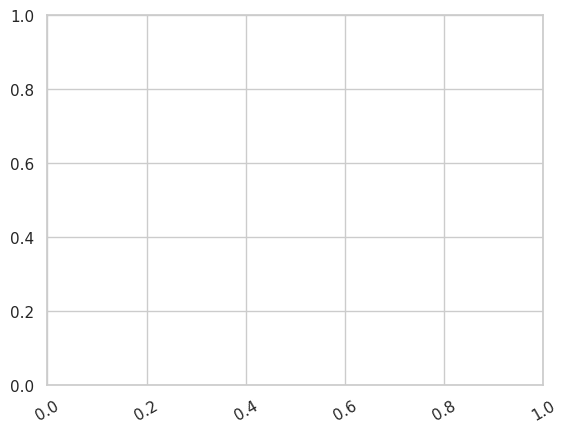

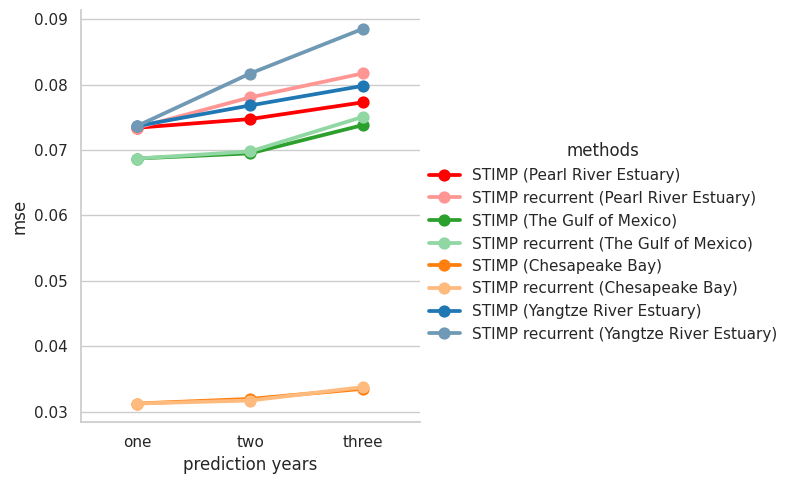

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {'mse': np.stack(mse_list, axis=0),
        'methods':category,
        'prediction years':pred_len}
print(mse_list)
data = pd.DataFrame.from_dict(data)
sns.set(style="whitegrid")
plt.xticks(rotation=30)

color_palette = [ "#6F99B4", "#1F77B4", "#FFBA7E","#FF7F0E", "#90D7A3",  "#2CA02C","#FF9693", "#FF0000"][::-1]

g = sns.catplot(x="prediction years", y="mse", hue="methods", kind="point", data=data, palette=sns.color_palette(color_palette),ci=None)

[0.19842117, 0.19842117, 0.19537379, 0.19537379, 0.13300127, 0.13300127, 0.19370107, 0.19370107, 0.20217308, 0.20428388, 0.19665544, 0.19752799, 0.13389565, 0.13388738, 0.19881311, 0.20496112, 0.20551196, 0.20853694, 0.20266944, 0.20524183, 0.13760743, 0.13821809, 0.20248224, 0.21483114]


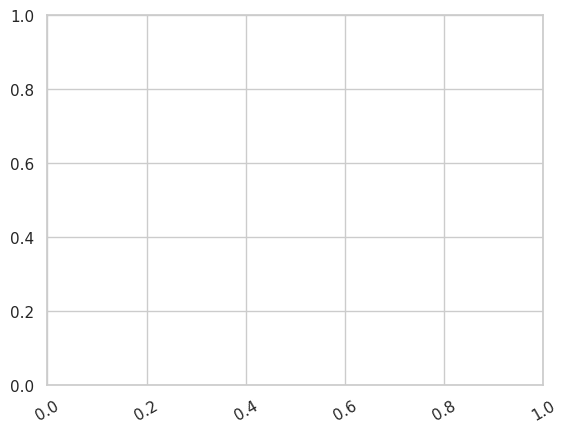

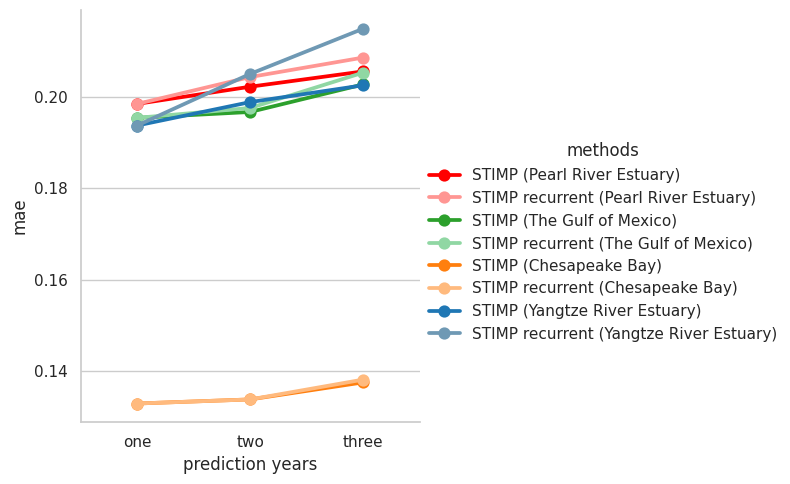

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {'mae': np.stack(mae_list, axis=0),
        'methods':category,
        'prediction years':pred_len}
print(mae_list)
data = pd.DataFrame.from_dict(data)
sns.set(style="whitegrid")
plt.xticks(rotation=30)
color_palette = [ "#6F99B4", "#1F77B4", "#FFBA7E","#FF7F0E", "#90D7A3",  "#2CA02C","#FF9693", "#FF0000"][::-1]

g = sns.catplot(x="prediction years", y="mae", hue="methods", kind="point", data=data, palette=sns.color_palette(color_palette),ci=None)

In [ ]:
tmp = np.array(mae_list[8:])

In [ ]:
print(tmp[1::2]/tmp[0::2])
print(mae_list)

[1.0104406  1.004437   0.99993825 1.0309236  1.0147192  1.0126926
 1.0044377  1.0609876 ]
[0.19842117, 0.19842117, 0.19537379, 0.19537379, 0.13300127, 0.13300127, 0.19370107, 0.19370107, 0.20217308, 0.20428388, 0.19665544, 0.19752799, 0.13389565, 0.13388738, 0.19881311, 0.20496112, 0.20551196, 0.20853694, 0.20266944, 0.20524183, 0.13760743, 0.13821809, 0.20248224, 0.21483114]


In [ ]:
mae_baseline = [0.29741377, 0.24866816, 0.15656155, 0.23034102, 0.30123833, 0.25227037, 0.16764102715290105,0.23470001]

In [ ]:
print(1-tmp[1::2]/mae_baseline)

[0.31313241 0.20565629 0.14482591 0.11018402 0.30773438 0.18642118
 0.17551155 0.08465644]
